In [1]:
%matplotlib widget 

In [2]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
#import scipy.stats as st
#from pprint import pprint
#import json
#import numpy as np
#import requests
#import time
#from scipy.stats import linregress
#import hvplot.pandas

# Import API key
#from api_keys import geoapify_key

In [3]:
# Load in file and store filepath in a variable
transit_file = Path("Resource/Metro-Systems-Worldwide.csv")

In [5]:
# Read and display the CSV with Pandas
transit_df = pd.read_csv(transit_file)
transit_df.head()

,City,Country\r\nregion,Name,Service\r\nopened,Last\r\nexpanded,Stations,System length,Annual ridership\r\n(millions)
0,Algiers,Algeria,Algiers Metro,2011,2018,19,18.5 km (11.5 mi),45.3 (2019)
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,78,56.7 km (35.2 mi),74.0 (2020)
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,12.1 km (7.5 mi),23.3 (2022)
3,Sydney,Australia,Sydney Metro,2019,–,13,36 km (22 mi),16.3 (2022)
4,Vienna,Austria,Vienna U-Bahn,1978,2017,98,83.3 km (51.8 mi),459.8 (2019)


In [6]:
# List all the columns in the table
transit_df.columns

Index(['City', 'Country\r\nregion', 'Name', 'Service\r\nopened',
       'Last\r\nexpanded', 'Stations', 'System length',
       'Annual ridership\r\n(millions)'],
      dtype='object')

In [7]:
# Use .rename(columns={}) to rename columns
transit_renamed_df = transit_df.rename(columns={"Country\r\nregion":"Country region", 
                                                "Service\r\nopened":"Service opened",
                                                "Last\r\nexpanded":"Last expanded",
                                                "Annual ridership\r\n(millions)":"Annual ridership (millions)"})
transit_renamed_df.head(20)

,City,Country region,Name,Service opened,Last expanded,Stations,System length,Annual ridership (millions)
0,Algiers,Algeria,Algiers Metro,2011,2018,19,18.5 km (11.5 mi),45.3 (2019)
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,78,56.7 km (35.2 mi),74.0 (2020)
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,12.1 km (7.5 mi),23.3 (2022)
3,Sydney,Australia,Sydney Metro,2019,–,13,36 km (22 mi),16.3 (2022)
4,Vienna,Austria,Vienna U-Bahn,1978,2017,98,83.3 km (51.8 mi),459.8 (2019)
5,Baku,Azerbaijan,Baku Metro,1967,2022,27,40.7 km (25.3 mi),202.5 (2022)
6,Dhaka,Bangladesh,Dhaka Metro Rail,2022,–,9,11.7 km (7.3 mi),NaN
7,Minsk,Belarus,Minsk Metro,1984,2020,33,40.8 km (25.4 mi),225.9 (2022)
8,Brussels,Belgium,Brussels Metro,1976,2009,59,39.9 km (24.8 mi),96.3 (2021)
9,Belo Horizonte,Brazil,Belo Horizonte Metro,1986,2002,19,28.1 km (17.5 mi),54.4 (2019)


In [8]:
transit_renamed_df.count()

City                           205
Country region                 205
Name                           205
Service opened                 205
Last expanded                  205
Stations                       205
System length                  205
Annual ridership (millions)    189
dtype: int64

In [9]:
# do I need to deal with the NaN's before splitting? turns out No

# splitting out Ridership years
split_year_df = transit_renamed_df.copy()
split_year_df[['Annual ridership (millions)', 'Annual ridership (year)']] = transit_renamed_df['Annual ridership (millions)'].apply(lambda x: pd.Series(str(x).split("(",)))
#split_year_df.head(10)
#split_year_df.dtypes   note Annual ridership is currently an object
#need to remove the "," for ridership in billions so can convert ridership to an integer
split_year_df['Annual ridership (millions)'] = split_year_df['Annual ridership (millions)'].str.replace(',', '')
split_year_df['Annual ridership (year)'] = split_year_df['Annual ridership (year)'].str.replace(')', '')
split_year_df['Annual ridership (millions)'] = split_year_df['Annual ridership (millions)'].astype(float)
#split_year_df.head(10)
split_transit_df = split_year_df.copy()
split_transit_df[['System length (in km)', 'System length (in mi)']] = split_year_df['System length'].apply(lambda x: pd.Series(str(x).split("(",)))
split_transit_df['System length (in km)'] = split_transit_df['System length (in km)'].str.replace('km', '')
split_transit_df['System length (in mi)'] = split_transit_df['System length (in mi)'].str.replace('mi', '')
split_transit_df['System length (in mi)'] = split_transit_df['System length (in mi)'].str.replace(')', '')
split_transit_df['System length (in km)'] = split_transit_df['System length (in km)'].astype(float)
split_transit_df['System length (in mi)'] = split_transit_df['System length (in mi)'].astype(float)
split_transit_df.head(10)

C:\Users\brian\AppData\Local\Temp\ipykernel_3436\968563272.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  split_year_df['Annual ridership (year)'] = split_year_df['Annual ridership (year)'].str.replace(')', '')
C:\Users\brian\AppData\Local\Temp\ipykernel_3436\968563272.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  split_transit_df['System length (in mi)'] = split_transit_df['System length (in mi)'].str.replace(')', '')


,City,Country region,Name,Service opened,Last expanded,Stations,System length,Annual ridership (millions),Annual ridership (year),System length (in km),System length (in mi)
0,Algiers,Algeria,Algiers Metro,2011,2018,19,18.5 km (11.5 mi),45.3,2019,18.5,11.5
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,78,56.7 km (35.2 mi),74.0,2020,56.7,35.2
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,12.1 km (7.5 mi),23.3,2022,12.1,7.5
3,Sydney,Australia,Sydney Metro,2019,–,13,36 km (22 mi),16.3,2022,36.0,22.0
4,Vienna,Austria,Vienna U-Bahn,1978,2017,98,83.3 km (51.8 mi),459.8,2019,83.3,51.8
5,Baku,Azerbaijan,Baku Metro,1967,2022,27,40.7 km (25.3 mi),202.5,2022,40.7,25.3
6,Dhaka,Bangladesh,Dhaka Metro Rail,2022,–,9,11.7 km (7.3 mi),NaN,NaN,11.7,7.3
7,Minsk,Belarus,Minsk Metro,1984,2020,33,40.8 km (25.4 mi),225.9,2022,40.8,25.4
8,Brussels,Belgium,Brussels Metro,1976,2009,59,39.9 km (24.8 mi),96.3,2021,39.9,24.8
9,Belo Horizonte,Brazil,Belo Horizonte Metro,1986,2002,19,28.1 km (17.5 mi),54.4,2019,28.1,17.5


In [10]:
drop_na_df = split_transit_df.dropna(how='any')
# works but completely removes the rows with an Na but not the dashes
drop_na_df.count() # shows all columns have 189 rows  dtype: int64
drop_na_df.head(10) # shows the deletion of Dhaka  (previous row 6)



,City,Country region,Name,Service opened,Last expanded,Stations,System length,Annual ridership (millions),Annual ridership (year),System length (in km),System length (in mi)
0,Algiers,Algeria,Algiers Metro,2011,2018,19,18.5 km (11.5 mi),45.3,2019,18.50,11.50
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,78,56.7 km (35.2 mi),74.0,2020,56.70,35.20
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,12.1 km (7.5 mi),23.3,2022,12.10,7.50
3,Sydney,Australia,Sydney Metro,2019,–,13,36 km (22 mi),16.3,2022,36.00,22.00
4,Vienna,Austria,Vienna U-Bahn,1978,2017,98,83.3 km (51.8 mi),459.8,2019,83.30,51.80
5,Baku,Azerbaijan,Baku Metro,1967,2022,27,40.7 km (25.3 mi),202.5,2022,40.70,25.30
7,Minsk,Belarus,Minsk Metro,1984,2020,33,40.8 km (25.4 mi),225.9,2022,40.80,25.40
8,Brussels,Belgium,Brussels Metro,1976,2009,59,39.9 km (24.8 mi),96.3,2021,39.90,24.80
9,Belo Horizonte,Brazil,Belo Horizonte Metro,1986,2002,19,28.1 km (17.5 mi),54.4,2019,28.10,17.50
10,Brasília,Brazil,Federal District Metro,2001,2020,27,42.38 km (26.33 mi),42.8,2019,42.38,26.33


In [11]:
# TRY to clean up Last expanded and Annual ridership (millions) category. 
#transit_renamed_df['Last expanded'] = transit_renamed_df['Last expanded'].replace({'–': 'NA'})
#transit_renamed_df.head()

#transit_renamed_df['Annual ridership (millions)'] = transit_renamed_df['Annual ridership (millions)'].replace({'n/a': 'Hello'})
#transit_renamed_df.head(15)

In [11]:
# number of countries with subway systems
country_count = transit_renamed_df["Country region"].unique().size
country_count
# there are 62 countries in our df

#total number of subway systems
subway_count = transit_renamed_df["City"].count()
subway_count
#there are 205 subway systems

#total number of subway stations
total_stations = transit_renamed_df["Stations"].sum()
total_stations
#there are 14195 subway stations

#total annual ridership of subways
total_ridership = split_year_df["Annual ridership (millions)"].sum()
total_ridership
#total annual ridership of subways is 58117.395 million

#total length of subway systems   
total_subway_length = split_transit_df["System length (in km)"].sum() 
total_subway_length
#total length of all subway systems is 20436.388 km  (circumference of earth is 40075.017 km)


20436.388

#potential questions to answer by coding

In [12]:
# Create Dataframe for top 20 longest subway
top_20_longest_subway = split_transit_df.sort_values(by='System length (in mi)', ascending=False).head(20)
top_20_longest_subway.head()


,City,Country region,Name,Service opened,Last expanded,Stations,System length,Annual ridership (millions),Annual ridership (year),System length (in km),System length (in mi)
50,Shanghai,China,Shanghai Metro,1993,2021,403,795.5 km (494.3 mi),2834.69,2020,795.50,494.30
22,Beijing,China,Beijing Subway,1971,2023,370,785.7 km (488.2 mi),2292.65,2020,785.70,488.20
32,Guangzhou,China,Guangzhou Metro,1997,2022,254,617.05 km (383.42 mi),2415.60,2020,617.05,383.42
53,Shenzhen,China,Shenzhen Metro,2004,2022,303,547.42 km (340.15 mi),2178.00,2021,547.42,340.15
26,Chengdu,China,Chengdu Metro,2010,2020,284,518.5 km (322.2 mi),1800.00,2021,518.50,322.20


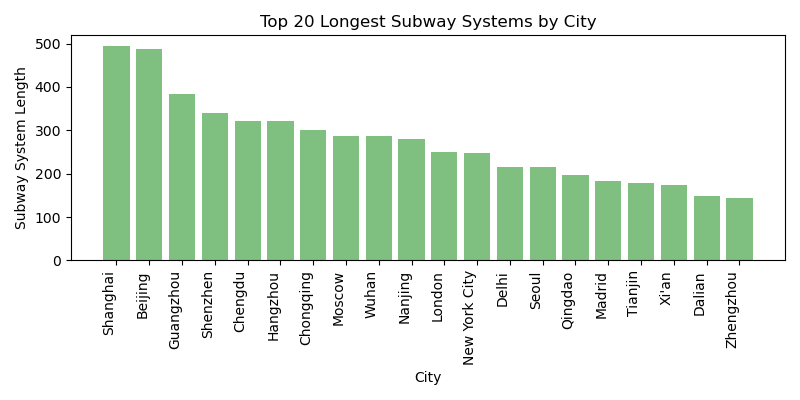

In [13]:
#bar plot top 20 longest subway systems by city with color of bar by country   
bar_plot_subway= top_20_longest_subway.sort_values(by='System length (in mi)', ascending=False).head(20)

#city_color = {'Shanghai': 'red', 'Beijing': 'blue', 'Guangzhou': 'yellow', 'Shenzhen': 'pink'}
#city_color = ['red', 'blue', 'yellow', 'green', 'orange','purple', 'pink,' ]


# Create the bar plot
plt.figure(figsize=(8, 4))
plt.bar(bar_plot_subway['City'], bar_plot_subway['System length (in mi)'], color ='green',alpha=0.5)

# Customize the plot
plt.xlabel('City')
plt.ylabel('Subway System Length')
plt.title('Top 20 Longest Subway Systems by City')
plt.xticks(rotation= 'vertical', ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
# Create Dataframe for top 20 numbers of passenger
top_20_number_of_passenger = split_transit_df.sort_values(by='Annual ridership (millions)', ascending=False).head(20)
top_20_number_of_passenger.head(20)

,City,Country region,Name,Service opened,Last expanded,Stations,System length,Annual ridership (millions),Annual ridership (year),System length (in km),System length (in mi)
50,Shanghai,China,Shanghai Metro,1993,2021,403,795.5 km (494.3 mi),2834.690,2020,795.500,494.300
125,Tokyo,Japan,Tokyo Metro,1927,2020,142,195.1 km (121.2 mi),2757.400,2019,195.100,121.200
32,Guangzhou,China,Guangzhou Metro,1997,2022,254,617.05 km (383.42 mi),2415.600,2020,617.050,383.420
22,Beijing,China,Beijing Subway,1971,2023,370,785.7 km (488.2 mi),2292.650,2020,785.700,488.200
53,Shenzhen,China,Shenzhen Metro,2004,2022,303,547.42 km (340.15 mi),2178.000,2021,547.420,340.150
136,Seoul,South Korea,Seoul Metropolitan Subway,1974,2022,279,345.3 km (214.6 mi),2127.200,2020,345.300,214.600
157,Moscow,Russia,Moscow Metro,1935,2023,289,461.5 km (286.8 mi),2061.800,2022,461.500,286.800
26,Chengdu,China,Chengdu Metro,2010,2020,284,518.5 km (322.2 mi),1800.000,2021,518.500,322.200
194,New York City,United States,New York City Subway,1904,2017,424,399 km (248 mi),1793.100,2022,399.000,248.000
90,Delhi,India,Delhi Metro,2002,2022,230,348.12 km (216.31 mi),1790.000,2019,348.120,216.310


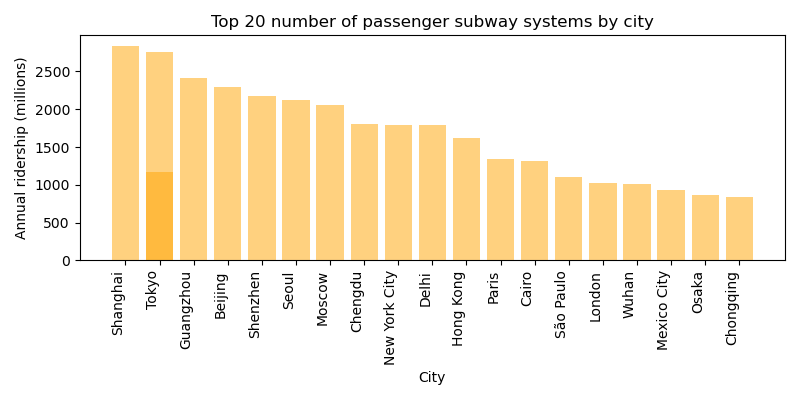

In [16]:
# bar plot top 20 number of passenger subway systems by city with color of bar by country     B
bar_plot_passengers= top_20_number_of_passenger.sort_values(by='Annual ridership (millions)', ascending=False).head(20)

# Create the bar plot
plt.figure(figsize=(8, 4))
plt.bar(bar_plot_passengers['City'], bar_plot_passengers['Annual ridership (millions)'], color ='orange', alpha=0.5)

# Customize the plot
plt.xlabel('City')
plt.ylabel('Annual ridership (millions)')
plt.title('Top 20 number of passenger subway systems by city')
plt.xticks(rotation= 'vertical', ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
#bar plot top 20 number subway systems by country with color of bar by country       C

In [16]:
#bar plot top 20 total subway systems length (in Km or miles) by (either by city and/or total for a country) with color of bar by country    D

In [17]:
#scatter plot length of subway systems vs number of subway systems     plot C vs D  and linear regression

In [15]:
#bar plot top 20 number of passenger subway systems by country  with color of bar by country    E
# total number of subway riders by country
country_total_ridership = split_transit_df.groupby('Country region')['Annual ridership (millions)'].sum()
#country_total_ridership
top_20_country_total_ridership = country_total_ridership.sort_values(ascending=False).head(20)
top_20_country_total_ridership.head(20)

Country region
China             20716.296
Japan              6485.400
South Korea        3380.100
Russia             2898.600
India              2634.920
United States      2278.900
France             1762.300
Brazil             1535.349
Egypt              1314.000
Mexico             1159.600
United Kingdom     1078.600
Turkey             1028.700
Germany             981.300
Iran                888.700
Italy               830.200
Taiwan              789.100
Singapore           766.500
Spain               757.330
Ukraine             734.700
Canada              597.800
Name: Annual ridership (millions), dtype: float64

In [19]:
#scatter plot of number of passenger vs total length of subway - either totals for a city or for a country to indicate how crowded the system is  and linear regression

In [20]:
#line plot of number of expansions per year (shows increasing demand recently but not surprising)
#line plot of number of new systems per year

In [21]:
#could look at smallest systems (size or number of stations or riders)
# do we see number of riders per station (choke point crowding)

In [22]:
# display world map and the cities with subway systems  (using module 6.3 code)